In [1]:
# import packages

# pandas for dataframe manipulation
import pandas as pd

# numerical python for some math needs
import numpy as np

# matplot lib and seaborn are graphical representation
import matplotlib.pyplot as plt
import seaborn as sns 

# stats model is more statistical modeling
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

# sklearn packages for various modeling/ machine learning
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [2]:
# load the cleaned data
NBA = pd.read_csv('NBA.csv')

In [3]:
# create the dependent variable, this wins column because we are trying to predict win totals
NBA_y = NBA['Wins']

In [4]:
# create the independent variable by removing the dependent variable and other description features
NBA_X = NBA.drop(columns=['Team', 'Wins','Season','Row ID'])

In [5]:
# split into a training and testing data sets.
# being sure to keep the test set away from the training data to not influence model development
X_train, X_test, y_train, y_test = train_test_split(NBA_X, NBA_y, test_size=0.2, random_state=15)

In [6]:
#standardize the data so they are all in the same format

#assign the standard scaler to a variable
scaler = preprocessing.StandardScaler()

#fit the scaler ON ONLY THE TRAINING SET
scaler.fit(X_train)

# process both the independent and dependent data through the standard scaler
# assigning them to new variables
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#first model selection is ridge. Ridge should work better than linearReg and Lasso due 
#to the colinearity of features

# I am using ridge cv so the alpha is optimized on it's own

#standardized
ridge_std = linear_model.RidgeCV()
model_ridge_std = ridge_std.fit(X_train_scaled, y_train)
ridge_coef = ridge_std.fit(X_train_scaled, y_train).coef_

#NOT standardized
ridge = linear_model.RidgeCV()
model_ridge = ridge.fit(X_train, y_train)
print('std : ', model_ridge_std.alpha_, 'not std : ',model_ridge.alpha_)

std :  0.1 not std :  1.0


As alpha increases model complexity reduces.

In [8]:
# comparing models
# .score provides the R squared. best result would be 1.0
model_ridge_std.score(X_train_scaled, y_train), model_ridge.score(X_train, y_train)

(0.4097123884156916, -425.2361777621615)

In [59]:
# the standardized model was WOW-ZERS BETTER, still not great


In [10]:
#continuing with just standardized

y_predRIDGE = model_ridge_std.predict(X_test_scaled)
win_predict_ridge = y_predRIDGE-y_test

In [113]:
# this it the difference in win percent prediction and real wins for those teams
win_predict_ridge = abs(win_predict_ridge)

win_predict_ridge

6      0.038940
61     0.092998
90     0.071609
30     0.102953
31     0.069740
55     0.146047
109    0.052302
98     0.244949
59     0.125029
103    0.010844
126    0.062241
97     0.235654
74     0.166243
67     0.071519
115    0.088519
25     0.002999
95     0.046974
100    0.148072
9      0.010505
129    0.009687
71     0.007647
47     0.053445
86     0.095789
57     0.059549
48     0.250479
5      0.049751
112    0.173281
148    0.141757
122    0.019190
78     0.104511
Name: Wins, dtype: float64

a few of these are really off. 48, 97, 98

In [17]:
#here are the real win totals for the test team/seasons
y_test

6      0.621951
61     0.658537
90     0.611000
30     0.585366
31     0.560976
55     0.634146
109    0.452000
98     0.231000
59     0.670732
103    0.417000
126    0.652778
97     0.732000
74     0.402439
67     0.451220
115    0.589000
25     0.341463
95     0.466000
100    0.573000
9      0.390244
129    0.430556
71     0.585366
47     0.524390
86     0.512195
57     0.353659
48     0.439024
5      0.292683
112    0.303000
148    0.375000
122    0.583333
78     0.475610
Name: Wins, dtype: float64

In [19]:
y_predRIDGE

array([0.58301089, 0.5655384 , 0.53939051, 0.48241274, 0.49123516,
       0.48809885, 0.50430173, 0.47594878, 0.54570297, 0.42784362,
       0.59053639, 0.49634586, 0.56868207, 0.52273889, 0.67751868,
       0.33846488, 0.41902556, 0.42492765, 0.40074874, 0.44024303,
       0.57771918, 0.57783508, 0.41640647, 0.41320774, 0.68950348,
       0.34243344, 0.47628071, 0.51675679, 0.56414299, 0.58012031])

In [16]:
# this prediction was .25 percent off. that is 20 wins. 
# the 2017 charlotte hornets were the kemba walker on a rookie contract, dwight howard at 23m 
# and nicholas batum at 22m. they were not good. they missed the playoffs. 
# those players definitely did not play to the level of their contract. 
# this model predicted 56 wins
# y_pred 0.68950348 y_test 0.439024
NBA.iloc[48]

Season              2017-18
Row ID                   18
Team      Charlotte Hornets
Wins               0.439024
1 TS             23500000.0
1% TS             20.046377
1% SC             23.715096
2 TS             45934783.0
2% TS             39.184085
2% SC             46.355225
3 TS             59103533.0
3% TS              50.41752
3% SC             59.644509
4 TS             72103533.0
4% TS             61.507005
4% SC             72.763498
5 TS             84687803.0
5% TS             72.241857
5% SC             85.462952
6 TS             96687803.0
6% TS             82.478305
6% SC             97.572788
7 TS            103687803.0
7% TS             88.449567
7% SC            104.636859
8 TS            106592283.0
8% TS             90.927196
8% SC            107.567924
9 TS            109439883.0
9% TS             93.356306
9% SC            110.441588
10 TS           112139883.0
10% TS            95.659506
10% SC           113.166301
Name: 48, dtype: object

In [18]:
# this is the 2019-20 champion lakers 1 seed in the west. they went 52-19 in the pandemic shortened season
# salary stuff for this team. lebron makes 37m and anthony davis makes 27m
# this model really didn't like this team predicting sub .500
# y_pred was 0.49634586 y_true was 0.732000

NBA.iloc[97]

Season               2019-20
Row ID                     7
Team      Los Angeles Lakers
Wins                   0.732
1 TS              37436858.0
1% TS                29.8459
1% SC              34.301684
2 TS              64529877.0
2% TS               51.44535
2% SC              59.125781
3 TS              79164023.0
3% TS              63.112174
3% SC              72.534381
4 TS              87253305.0
4% TS              69.561217
4% SC               79.94622
5 TS              92253305.0
5% TS              73.547382
5% SC              84.527492
6 TS              97020305.0
6% TS              77.347792
6% SC              88.895277
7 TS             101020305.0
7% TS              80.536724
7% SC              92.560294
8 TS             104520305.0
8% TS               83.32704
8% SC              95.767184
9 TS             107520305.0
9% TS              85.718739
9% SC              98.515947
10 TS            110270305.0
10% TS              87.91113
10% SC            101.035647
Name: 97, dtyp

In [22]:
#The pandemic season warriors were super injured. 
#Stephen curry 40m injured klay thompson 32m injured full season
# y_pred 0.47594878 y_test 0.231000
# i am learning this model does not like super stars
NBA.iloc[98]

Season                  2019-20
Row ID                        8
Team      Golden State Warriors
Wins                      0.231
1 TS                 40231758.0
1% TS                 30.587996
1% SC                 36.862523
2 TS                 72973758.0
2% TS                 55.481568
2% SC                 66.862523
3 TS                100478388.0
3% TS                 76.393195
3% SC                  92.06376
4 TS                119017518.0
4% TS                 90.488399
4% SC                109.050319
5 TS                123481804.0
5% TS                 93.882572
5% SC                 113.14074
6 TS                125446564.0
6% TS                 95.376369
6% SC                 114.94096
7 TS                126859836.0
7% TS                 96.450872
7% SC                116.235877
8 TS                127758146.0
8% TS                 97.133853
8% SC                117.058957
9 TS                128656456.0
9% TS                 97.816833
9% SC                117.882038
10 TS   

In [26]:
# average of 7.5 wins off real.. 25% 3.9 wins off.. 50% 5.86 wins off
# I would be happy with an average of 4 wins
# correction! I checked some vegas odds for win predictions against outcomes
# vegas was off by 5.3 wins for the 2020-21 season that is the mark to beat.

abs_win = abs(win_predict_ridge)
abs_win.describe()

count    30.000000
mean      0.091774
std       0.070588
min       0.002999
25%       0.047668
50%       0.071564
75%       0.137575
max       0.250479
Name: Wins, dtype: float64

In [27]:
# trying a different type of scaling

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_mms = min_max_scaler.transform(X_train)
X_test_mms = min_max_scaler.transform(X_test)

In [28]:
#min max std with ridge cv
mms_ridge = linear_model.RidgeCV()
mms_ridge_model = mms_ridge.fit(X_train_mms, y_train)

#NOT standardized is the same so do nothing new

print('min max std : ', mms_ridge_model.alpha_)

min max std :  0.1


In [29]:
#comparing models... reminder 1.0 is the best score
model_ridge_std.score(X_train_scaled, y_train), mms_ridge_model.score(X_train_mms, y_train)

(0.4097123884156916, 0.3368239173740357)

In [30]:
#lets try power transformer
power = preprocessing.PowerTransformer(method='box-cox')
power.fit(X_train)
X_train_power = power.transform(X_train)
X_test_power = power.transform(X_test)

In [31]:
#power
ridge_power = linear_model.RidgeCV()
model_ridge_power = ridge_power.fit(X_train_power, y_train)

In [32]:
#comparing standardizer
model_ridge_power.score(X_train_power, y_train)

0.31118085572014853

In [33]:
#the standardscaler did better than the min max scaler and the power transformer

In [34]:
#let's test lasso
names = NBA.drop(['Team', 'Wins','Season','Row ID'], axis=1).columns
lasso = linear_model.LassoCV(max_iter=200000)
model_lasso = lasso.fit(X_train_scaled, y_train)
lasso_coef = lasso.fit(X_train_scaled, y_train).coef_
model_lasso.score(X_train_scaled, y_train)

0.25389945197408603

In [97]:
model_lasso.alpha_

0.009959047821398805

In [79]:
#like expected lasso has a worse r2
y_pred_lasso = model_lasso.predict(X_test_scaled)
win_predict_lasso = y_pred_lasso-y_test
win_predict_lasso = abs(win_predict_lasso)
win_predict_lasso

6      0.064071
61     0.112170
90     0.055939
30     0.102928
31     0.067850
55     0.142599
109    0.034116
98     0.397170
59     0.139950
103    0.050715
126    0.068305
97     0.228571
74     0.140257
67     0.053809
115    0.005150
25     0.032272
95     0.028717
100    0.108125
9      0.006529
129    0.045848
71     0.066202
47     0.042932
86     0.039461
57     0.115337
48     0.119895
5      0.131896
112    0.187322
148    0.168414
122    0.038256
78     0.041672
Name: Wins, dtype: float64

In [80]:
# lasso is better. I now the average is worse however the worst prediction, the super injured warriors 
# went up to 0.39 off from 0.25
win_predict_lasso.describe()

count    30.000000
mean      0.094549
std       0.079425
min       0.005150
25%       0.041987
50%       0.067026
75%       0.128896
max       0.397170
Name: Wins, dtype: float64

In [81]:
y_pred_lasso

array([0.55787981, 0.5463663 , 0.55506138, 0.4824374 , 0.49312523,
       0.49154732, 0.48611647, 0.62816985, 0.53078188, 0.46771476,
       0.58447296, 0.50342902, 0.54269627, 0.50502811, 0.58384956,
       0.37373507, 0.49471662, 0.46487469, 0.39677289, 0.47640391,
       0.51916351, 0.56732251, 0.47273362, 0.4689958 , 0.5589189 ,
       0.42457905, 0.49032162, 0.54341357, 0.54507708, 0.51728222])

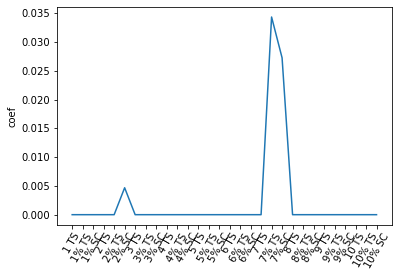

In [21]:
# lasso will tell you the most influential variables
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('coef')
plt.show()

7 players percent of total salary, 7 players % salary cap, and 2 players Salary cap

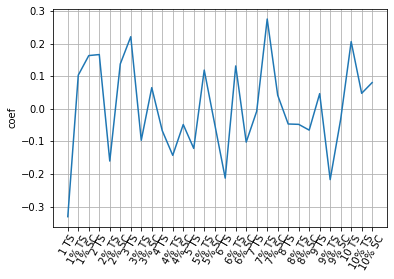

In [22]:
# let's see how the ridge proformed the weighting of features
_ = plt.plot(range(len(names)), ridge_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('coef')
_ = plt.grid()
plt.show()

the favorite variable was also 7% total salary, however preferred 3 player total salary second and 10 Total salary

In [37]:
# Linear Regression model
lr = linear_model.LinearRegression()

In [38]:
# again fit to standard scaler
lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)

0.5201432823399936

This is better than ridge cv

In [40]:
# generating linear regression predictions
LR_y_pred = lr.predict(X_test_scaled)

# difference between predictions and reality
linear_pred = LR_y_pred-y_test

# checking results
LR_win_abs = abs(linear_pred)
LR_win_abs

6      0.095633
61     0.123779
90     0.094323
30     0.081238
31     0.004801
55     0.157653
109    0.087213
98     0.168152
59     0.128240
103    0.002901
126    0.028352
97     0.218431
74     0.183252
67     0.077249
115    0.069700
25     0.058423
95     0.105853
100    0.180827
9      0.042723
129    0.068680
71     0.001786
47     0.059452
86     0.075025
57     0.056344
48     0.232309
5      0.051844
112    0.170649
148    0.245342
122    0.063507
78     0.099308
Name: Wins, dtype: float64

In [42]:
LR_y_pred

array([0.52631807, 0.53475741, 0.51667728, 0.50412829, 0.5657766 ,
       0.47649314, 0.53921253, 0.39915211, 0.54249176, 0.41990112,
       0.62442579, 0.51356925, 0.58569071, 0.52846807, 0.5193004 ,
       0.28304086, 0.36014721, 0.39217341, 0.34752123, 0.36187533,
       0.58715181, 0.58384265, 0.43716972, 0.41000228, 0.67133323,
       0.34452707, 0.47364894, 0.62034152, 0.51982675, 0.57491819])

The worst predictions came from 148, 48, 97, 74, 100
We already know who 48 (charlotte hornets) and 97 (injured warriors)

In [41]:
# who is 148. The pandemic 2020-21 Toronto raptors! this team played home games in tampa, Fl
# so they wouldn't have to cross the border all the time. 
# y_pred 0.62034152  y_test 0.375
NBA.iloc[148]

Season            2020-21
Row ID                 28
Team      Toronto Raptors
Wins                0.375
1 TS           30559200.0
1% TS           23.905854
1% SC                28.0
2 TS           61059200.0
2% TS           47.765397
2% SC           55.945758
3 TS           82309200.0
3% TS            64.38885
3% SC           75.416163
4 TS           92356650.0
4% TS            72.24877
4% SC           84.622183
5 TS           99356650.0
5% TS            77.72473
5% SC           91.035963
6 TS          105856650.0
6% TS           82.809551
6% SC           96.991616
7 TS          109856650.0
7% TS           85.938672
7% SC          100.656634
8 TS          113728865.0
8% TS           88.967828
8% SC          104.204568
9 TS          117533015.0
9% TS           91.943739
9% SC          107.690137
10 TS         119791015.0
10% TS          93.710128
10% SC         109.759039
Name: 148, dtype: object

In [43]:
# Just an aging team that traded their players away
# i would not have guessed they would win 48 (0.5856) wins however I would have guessed... something like 44
# this one is just wrong
# y_pred 0.58569071 y_test 0.40
NBA.iloc[74]

Season              2018-19
Row ID                   14
Team      Memphis Grizzlies
Wins               0.402439
1 TS             30521116.0
1% TS             24.440927
1% SC             29.961142
2 TS             54628374.0
2% TS             43.745717
2% SC             53.626102
3 TS             71167700.0
3% TS             56.990202
3% SC              69.86198
4 TS             83167700.0
4% TS             66.599652
4% SC             81.641814
5 TS             91808700.0
5% TS             73.519256
5% SC             90.124277
6 TS            100142033.0
6% TS             80.192485
6% SC             98.304718
7 TS            106057073.0
7% TS             84.929175
7% SC            104.111234
8 TS            110441689.0
8% TS             88.440321
8% SC            108.415405
9 TS            112978587.0
9% TS             90.471837
9% SC            110.905758
10 TS           115154847.0
10% TS            92.214558
10% SC            113.04209
Name: 74, dtype: object

In [44]:
#Luka's Rookie season! ya this team definitely out performed their estimates
# y_pred 0.39217341 (32 wins) y_test 0.573 (46 wins)
NBA.iloc[100]

Season             2019-20
Row ID                  10
Team      Dallas Mavericks
Wins                 0.573
1 TS            27285000.0
1% TS             22.34829
1% SC                 25.0
2 TS            45435000.0
2% TS            37.214388
2% SC            41.630016
3 TS            58194670.0
3% TS            47.665435
3% SC             53.32112
4 TS            68454045.0
4% TS            56.068568
4% SC            62.721317
5 TS            77927729.0
5% TS            63.828166
5% SC            71.401621
6 TS            85927729.0
6% TS            70.380716
6% SC            78.731656
7 TS            93611089.0
7% TS            76.673916
7% SC            85.771568
8 TS           101072469.0
8% TS            82.785299
8% SC             92.60809
9 TS           105072469.0
9% TS            86.061574
9% SC            96.273107
10 TS          108572469.0
10% TS           88.928315
10% SC           99.479997
Name: 100, dtype: object

In [45]:
# let's explore how close it is
# average of 8.2 wins off real.. 25% 4.8 wins off.. 50% 6.89 wins off
# this was slightly worse.  this makes sense. Linear Regression is ridge regression was alpha = 0 

LR_win_abs.describe()

count    30.000000
mean      0.101100
std       0.066832
min       0.001786
25%       0.058680
50%       0.084225
75%       0.150300
max       0.245342
Name: Wins, dtype: float64

In [47]:
# mean squared error for ridge cv
mean_squared_error(y_test, y_predRIDGE)

0.013239120843509382

In [48]:
# mean squared error for linear regression
mean_squared_error(y_test, LR_y_pred)

0.014538732733912032

The mean squared error is consistant that ridge was better than linear Reg

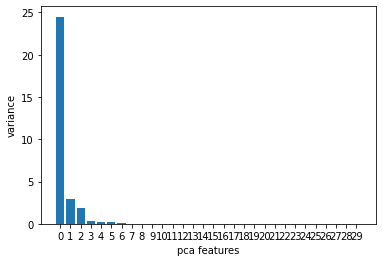

In [49]:
# checking some decomp
pca = PCA()
pca.fit(X_train_scaled)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('pca features')
plt.show()

In [84]:
#this agrees with lasso that only 3 features are meaningful; 
#get 2 great players and then also spend most of your money on the top 7

In [75]:
# before I head over to the next type of model
# let's see if we can make ridgecv even better.  Ridge cv does automate some hyperparameter tuning already.

# new ridge default scoring is neg_mean_absolute_error
ridge_2 = linear_model.RidgeCV(alphas = np.arange(0.5, 20, 0.1), scoring='r2') 
model_ridge_2 = ridge_2.fit(X_train_scaled, y_train)
ridge_2_coef = ridge_std.fit(X_train_scaled, y_train).coef_

print("what's my alpha! : ", model_ridge_2.alpha_)

what's my alpha! :  2.4999999999999996


In [76]:
#check how it is doing with the new BIG alpha 

y_predRIDGE_2 = model_ridge_2.predict(X_test_scaled)
win_predict_ridge_2 = y_predRIDGE_2-y_test
win_predict_ridge_2 = abs(win_predict_ridge_2)
win_predict_ridge_2

6      0.035796
61     0.104738
90     0.072953
30     0.108227
31     0.078985
55     0.109768
109    0.016494
98     0.289683
59     0.127753
103    0.025886
126    0.059496
97     0.233223
74     0.163378
67     0.061959
115    0.042112
25     0.023222
95     0.031110
100    0.125315
9      0.023914
129    0.042379
71     0.039865
47     0.062209
86     0.060020
57     0.071577
48     0.198035
5      0.082451
112    0.173172
148    0.139512
122    0.011773
78     0.083526
Name: Wins, dtype: float64

In [77]:
# r2 is worse...
model_ridge_2.score(X_train_scaled, y_train)

0.3356105775220761

In [78]:
# but predictions are better on average
win_predict_ridge_2.describe(), abs_win.describe()

(count    30.000000
 mean      0.089951
 std       0.067620
 min       0.011773
 25%       0.040427
 50%       0.072265
 75%       0.121428
 max       0.289683
 Name: Wins, dtype: float64,
 count    30.000000
 mean      0.091774
 std       0.070588
 min       0.002999
 25%       0.047668
 50%       0.071564
 75%       0.137575
 max       0.250479
 Name: Wins, dtype: float64)

the ridge model really likes an alpha near zero. however if you remove that as an option alpha = 2.5 gets better predictions

In [98]:
#let's test lasso with newer alphas

lasso_2 = linear_model.LassoCV(max_iter=200000, alphas=np.arange(0.001,3,0.001))
model_lasso_2 = lasso_2.fit(X_train_scaled, y_train)
lasso_coef_2 = lasso_2.fit(X_train_scaled, y_train).coef_
model_lasso_2.score(X_train_scaled, y_train)


0.25385423554108644

That is a nicer score

In [99]:
model_lasso_2.alpha_

0.010000000000000002

In [104]:
y_pred_lasso_2 = model_lasso_2.predict(X_test_scaled)
win_predict_lasso_2 = y_pred_lasso_2-y_test
win_predict_lasso_2 = abs(win_predict_lasso_2)
win_predict_lasso_2

6      0.064097
61     0.112199
90     0.055972
30     0.102904
31     0.067843
55     0.142587
109    0.034131
98     0.397082
59     0.139977
103    0.050742
126    0.068366
97     0.228586
74     0.140230
67     0.053805
115    0.005211
25     0.032369
95     0.028727
100    0.108098
9      0.006608
129    0.045866
71     0.066212
47     0.042899
86     0.039431
57     0.115366
48     0.119869
5      0.131959
112    0.187329
148    0.168383
122    0.038288
78     0.041676
Name: Wins, dtype: float64

In [105]:
## lasso                           ridge_2                         ridge 1
win_predict_lasso_2.describe(), win_predict_ridge_2.describe(), abs_win.describe()

(count    30.000000
 mean      0.094560
 std       0.079404
 min       0.005211
 25%       0.041982
 50%       0.067028
 75%       0.128937
 max       0.397082
 Name: Wins, dtype: float64,
 count    30.000000
 mean      0.089951
 std       0.067620
 min       0.011773
 25%       0.040427
 50%       0.072265
 75%       0.121428
 max       0.289683
 Name: Wins, dtype: float64,
 count    30.000000
 mean      0.091774
 std       0.070588
 min       0.002999
 25%       0.047668
 50%       0.071564
 75%       0.137575
 max       0.250479
 Name: Wins, dtype: float64)

In [106]:
np.max(win_predict_lasso_2)

0.39708215677482395

In [102]:
y_pred_lasso_2

array([0.5578544 , 0.54633777, 0.5550283 , 0.48246188, 0.49313227,
       0.49155972, 0.48613084, 0.62808216, 0.53075448, 0.46774205,
       0.58441156, 0.50341377, 0.5426693 , 0.50502441, 0.58378924,
       0.3738328 , 0.49472724, 0.46490177, 0.39685231, 0.47642177,
       0.51915404, 0.56728959, 0.47276363, 0.46902411, 0.55889299,
       0.42464226, 0.49032925, 0.54338262, 0.54504559, 0.51728553])

In [111]:
# total difference, removing the worst prediction, then calculating the new average difference
print("lasso 2 : ",(np.sum(win_predict_lasso_2)-np.max(win_predict_lasso_2))/29,
      "lasso 1 : ",(np.sum(win_predict_lasso)-np.max(win_predict_lasso))/29,
      "ridge 2 : ",(np.sum(win_predict_ridge_2)-np.max(win_predict_ridge_2))/29,
      "ridge 1 : ",(np.sum(abs_win)-np.max(abs_win))/29)

lasso 2 :  0.08412864840923184 lasso 1 :  0.08411414287017498 ridge 2 :  0.0830636816400322 ridge 1 :  0.0863015340766084


That is close. ridge 2 eeks out a win against lasso 1. At the moment I still like lasso 1. The lasso predictions better reflect my feelings about what COULD have happened. 


In [138]:
# running a random forest regressor, or ensemble method. 

# I have selected absolute error because I am less worried about large error.
# I am comparing to vegas predictions and if you lose a bet you lose a bet. The degree of how bad is irrelevant

RandomForestReg = RandomForestRegressor(n_estimators=1000, criterion='mae')
RFR_model = RandomForestReg.fit(X_train_scaled,y_train)
RFR_pred = RFR_model.predict(X_test_scaled)
RFR_model.score(X_train_scaled,y_train)


0.8995497612539303

In [139]:
# determining how close predictions are
WP_RandomForestR = RFR_pred-y_test
WP_RandomForestR = abs(WP_RandomForestR)
WP_RandomForestR

6      0.127859
61     0.082225
90     0.062166
30     0.069254
31     0.056472
55     0.152406
109    0.002156
98     0.392603
59     0.046961
103    0.055943
126    0.019826
97     0.265340
74     0.162207
67     0.027247
115    0.062766
25     0.039204
95     0.010597
100    0.095265
9      0.025468
129    0.005042
71     0.032455
47     0.041193
86     0.039845
57     0.136163
48     0.071759
5      0.084856
112    0.185994
148    0.235150
122    0.022686
78     0.079993
Name: Wins, dtype: float64

In [140]:
# better average with a high max
WP_RandomForestR.describe()

count    30.000000
mean      0.089703
std       0.087392
min       0.002156
25%       0.034142
50%       0.062466
75%       0.119711
max       0.392603
Name: Wins, dtype: float64

In [141]:
# total difference, removing the worst prediction, then calculating the new average difference
print("lasso 1 : ",(np.sum(win_predict_lasso)-np.max(win_predict_lasso))/29,
      "ridge 2 : ",(np.sum(win_predict_ridge_2)-np.max(win_predict_ridge_2))/29,
      "RandomF 1 : ",(np.sum(WP_RandomForestR)-np.max(WP_RandomForestR))/29)

lasso 1 :  0.08411414287017498 ridge 2 :  0.0830636816400322 RandomF 1 :  0.07925860877488114


In [ ]:
# New Leader 6.5 wins off on average. 